# 로지스틱 회귀
: 선형 방정식을 이용해서 회귀한 단어가 있지만 실제적으로 분류(Calssification)에대한 확률을 계산하는 모델.
- 1에 가까운 숫자일수록 좋은거고, 0에 가까울수롤 False이고

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
fish = pd.read_csv("../Data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# Traget으로 사용된 Species의 종류 알아보기
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Feature와 Target Data정리하기


In [4]:
# Feature Data
fish_input = fish.iloc[:,1:]
fish_input = fish_input.to_numpy()
fish_input[0:6]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ],
       [450.    ,  29.7   ,  34.7   ,  13.6024,   4.9274]])

In [5]:
# Target Data
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## Train과 Test 분리하기

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input , train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

In [8]:
train_input[:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

### 표준화 시키기
: 각 컬럼별 데이터 크기 차이가 너무 많이 나네?

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
print(train_input[:5])
print(train_scaled[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


---
### KNN을 이용한 확률 예측
- KNN으로 확률 쓸 수 있구나

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print("train score : ", kn.score(train_scaled, train_target))
print("test score : ", kn.score(test_scaled, test_target))

train score :  0.8907563025210085
test score :  0.85


In [12]:
# kn의 분류 정보보기
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

> 확률 나오는 컬럼 순서

In [13]:
# test data로 예측해보기
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

- 여기부터 중요

In [14]:
# test data의 확률(predict_proba) 예측값 보기
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4) # decimals=4 소수점 이하 4자리로 정리

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

- 퍼센트로 나옴   
array([   
       'Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)   
array([   
       [0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],   
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],   
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],   
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],   
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])   

In [15]:
# test data의 3번째에 대한 이웃들을 알아보기
# numpy라서 부를때 test_scaled[3:4] 이렇게 불러와야함

distance , indexes = kn.kneighbors(test_scaled[3:4])
indexes

array([[104, 115, 106]])

In [16]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

> KNN은 이웃의 갯수를 정하는 모델이다.  
> 현재 이웃의 갯수를 3으로 하였기 때문에 확률로 나올수 있는 경우의 수는 3가지($1/3$, $2/3$, $3/3$) 이다.  
> Perch가 2개고 Roach가 하나나옴

--- 
# 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 하용하는 다중회귀(다항X)를 이용한 확률(기울기와 항이 다 다른애들) 
- 다중회귀($Y = a1X1 + a2X2 + ... + b$)
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델임.  
- 선형 회귀식에서 출발하였고 딥러닝 모델의 기반임

기본적으로 위(fish)의 데이터를 보면  
z = a*무게 + b*길이 + c*대각선 + d*두께 + f 로 구성되어있다.  
위의 z식을 이용하면 나오는 결과값은 -무한대 ~ +무한대의 범위로 결과 값이 출력된다.(그래서 확률을 못구해)  
(그래서) 이를 해결하는 방법이 Sigmoid함수를 사용한다.   
Sigmoid 함수는 결과값이 0 ~1.0사이의 수만 출력하므로 0.5를 기준으로 양성클래스(1), 음성클래스(0)를 분류한다  
로지스틱 회귀를 사용할 경우에는 이 Sigmoid함수를 로지스틱함수라고 표현한다.

In [17]:
# np.zeros(10)
# np.ones(10)
# np.full(10,2)
# np.full(10,3)

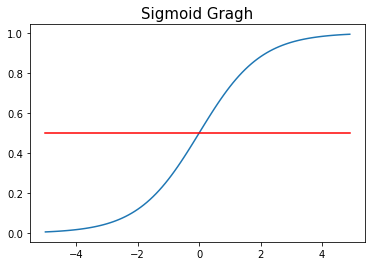

In [18]:
# Sigmoid Gragh 출력
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
# 100행 1열 0.5로 만들어서 가운데 직선을 하나 그리기위해 선언.
y = np.full((100, 1), 0.5)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.plot(z, y, c = 'red')
plt.title("Sigmoid Gragh", size = 15)
plt.show()

> 실질적으로 x의 값이 0이상이면 양성클래스로 0이하면 음성클래스로 분류하며 이를 이용하는것이 predict함수이며  
> 각각의 확률수치를 알아보는것이 predict_proba함수이다

---
## 로지스틱 회귀로 이진분류 수행하기

In [19]:
# 2종류의 데이터만 발췌 하기
bream_smlet_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smlet = train_scaled[bream_smlet_indexes]
traget_bream_smlet = train_target[bream_smlet_indexes]
print(train_bream_smlet[:5])
print(traget_bream_smlet[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [20]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smlet, traget_bream_smlet)

LogisticRegression()

In [21]:
lr.predict(train_bream_smlet[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [22]:
# 확률값 컬럼 순서 확인
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [23]:
# 확률값으로 보기
lr.predict_proba(train_bream_smlet[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [25]:
# 회귀식으 기울기(가중치)
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [26]:
# 다중식으로 계산
decision = lr.decision_function(train_bream_smlet[:5])
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [28]:
# Sigmoid 함수에 대입 하여 (양성 클래스를 기준으로 : True )확률값을 구성한다.
# Sigmoid는 1번에 대한 확률값만 나오고 나머지 0값은 1에서 빼서 나옴.
from scipy.special import expit
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

> 로지스틱회귀는 회귀를 통해서 확률을 구하는것이다.
> 회귀식을 확률로 나타낼수 있는건 Sigmoid밖에 없다.

---
## 로지스틱 회귀로 다중 분류 수행하기

In [35]:
# C : 규제(릿지규제 : L1)값이며 기본값은 1이다, 적은 수가 강한 규제 의미
# max_iter(역전파) : 반복횟수, 모델의 정확성을 유지하기 위해 반복작업을 실시한다. 기본값은 100
lr = LogisticRegression(C=20, max_iter=1000)

lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [36]:
# Test data 로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [38]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [37]:
# Test data 확률값으로 예측
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [39]:
# 사용된 다중 공식
print(lr.coef_, lr.intercept_)

[[-1.48987947 -1.02990953  2.5943557   7.70317343 -1.20033025]
 [ 0.19634548 -2.00943128 -3.78042862  6.50475259 -1.99514569]
 [ 3.56251132  6.3440727  -8.49003186 -5.75747072  3.79323642]
 [-0.10502282  3.60283339  3.9306439  -3.61704937 -1.75100047]
 [-1.40029234 -6.0752909   5.25937899 -0.87225852  1.86066972]
 [-1.3853437   1.49231097  1.39234242 -5.67722595 -4.40100291]
 [ 0.62168152 -2.32458536 -0.90626054  1.71607854  3.69357318]] [-0.09215467 -0.26294938  3.25077434 -0.14657892  2.65465827 -6.78789762
  1.38414798]


> 다중회귀인 경우에는 각 샘플별로 회귀식을 구성하여 계산한다.  
> 이진분류 처럼 클래스(Classification) 하나를 계산하여 나머지 클래스는 1에서 빼기를 통한 확률로는 구할 수 없어서  
> 각 컬럼과 Target을 일일이 계산하여야 한다.

In [41]:
# 확률 분포 검증
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


> 계산할 항목이 여러개 이므로 이를 Sigmoid를 사용하면 각자의 값이 생성되어 확률의 합이 1이 넘는 경우가 발생한다.   
> 다중 항목인 경우에는 Softmax를 사용한다.

# SoftMax 함수

list 한줄의 합이 1이 나와야 함! 하지만 sigmoid는 안돼서 사용하는거임

In [42]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [48]:
# 1이 넘은건 round로 잘라서 그런것임.
# 1.001 정도는 1이라고 해~
sum([0,0.014, 0.841, 0, 0.136, 0.007, 0.003])

1.001

In [43]:
# Sigmoid 함수에 대입 하여 (양성 클래스를 기준으로 : True )확률값을 구성한다.
# Sigmoid는 1번에 대한 확률값만 나오고 나머지 0값은 1에서 빼서 나옴.
from scipy.special import expit
print(expit(decision))

[[1.50346129e-03 7.37300095e-01 9.94309707e-01 6.13930003e-02
  9.65732469e-01 5.80836364e-01 3.46471834e-01]
 [1.92107578e-05 8.72914642e-01 9.91593669e-01 8.34415524e-02
  9.51567437e-01 9.99606824e-01 1.39310823e-02]
 [1.29275101e-02 1.96044380e-03 9.59854208e-01 9.98480116e-01
  9.13472135e-01 9.18426140e-01 2.03962860e-02]
 [3.35473692e-01 6.11243628e-01 9.33812558e-01 2.34050618e-01
  9.63180490e-01 3.16365352e-03 7.78755377e-01]
 [1.66340729e-03 1.19956294e-01 9.97027734e-01 4.72747114e-01
  9.70759862e-01 4.72065405e-01 3.30273173e-01]]


In [47]:
sum([1.50346129e-03 ,7.37300095e-01 ,9.94309707e-01, 6.13930003e-02,
  9.65732469e-01 ,5.80836364e-01 ,3.46471834e-01])

3.68754693059

> Sigmoid로 한 결과값의 첫번째 행을 더했는데 1이 넘었다. -> 사용할수 없다.